In [1]:
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import kkpy

In [2]:
indir = '/disk/common/kwonil/MRR/DATA_NC/ICEPOP/'
target_dt = datetime.datetime(2018,3,7)
MRRs = {}
sites = ['YPO', 'MHS', 'BKC', 'GWU']
for site in sites:
    MRRs[site] = Dataset(f'{indir}/{site}/{target_dt:%Y%m}/{target_dt:%Y%m%d}.nc')

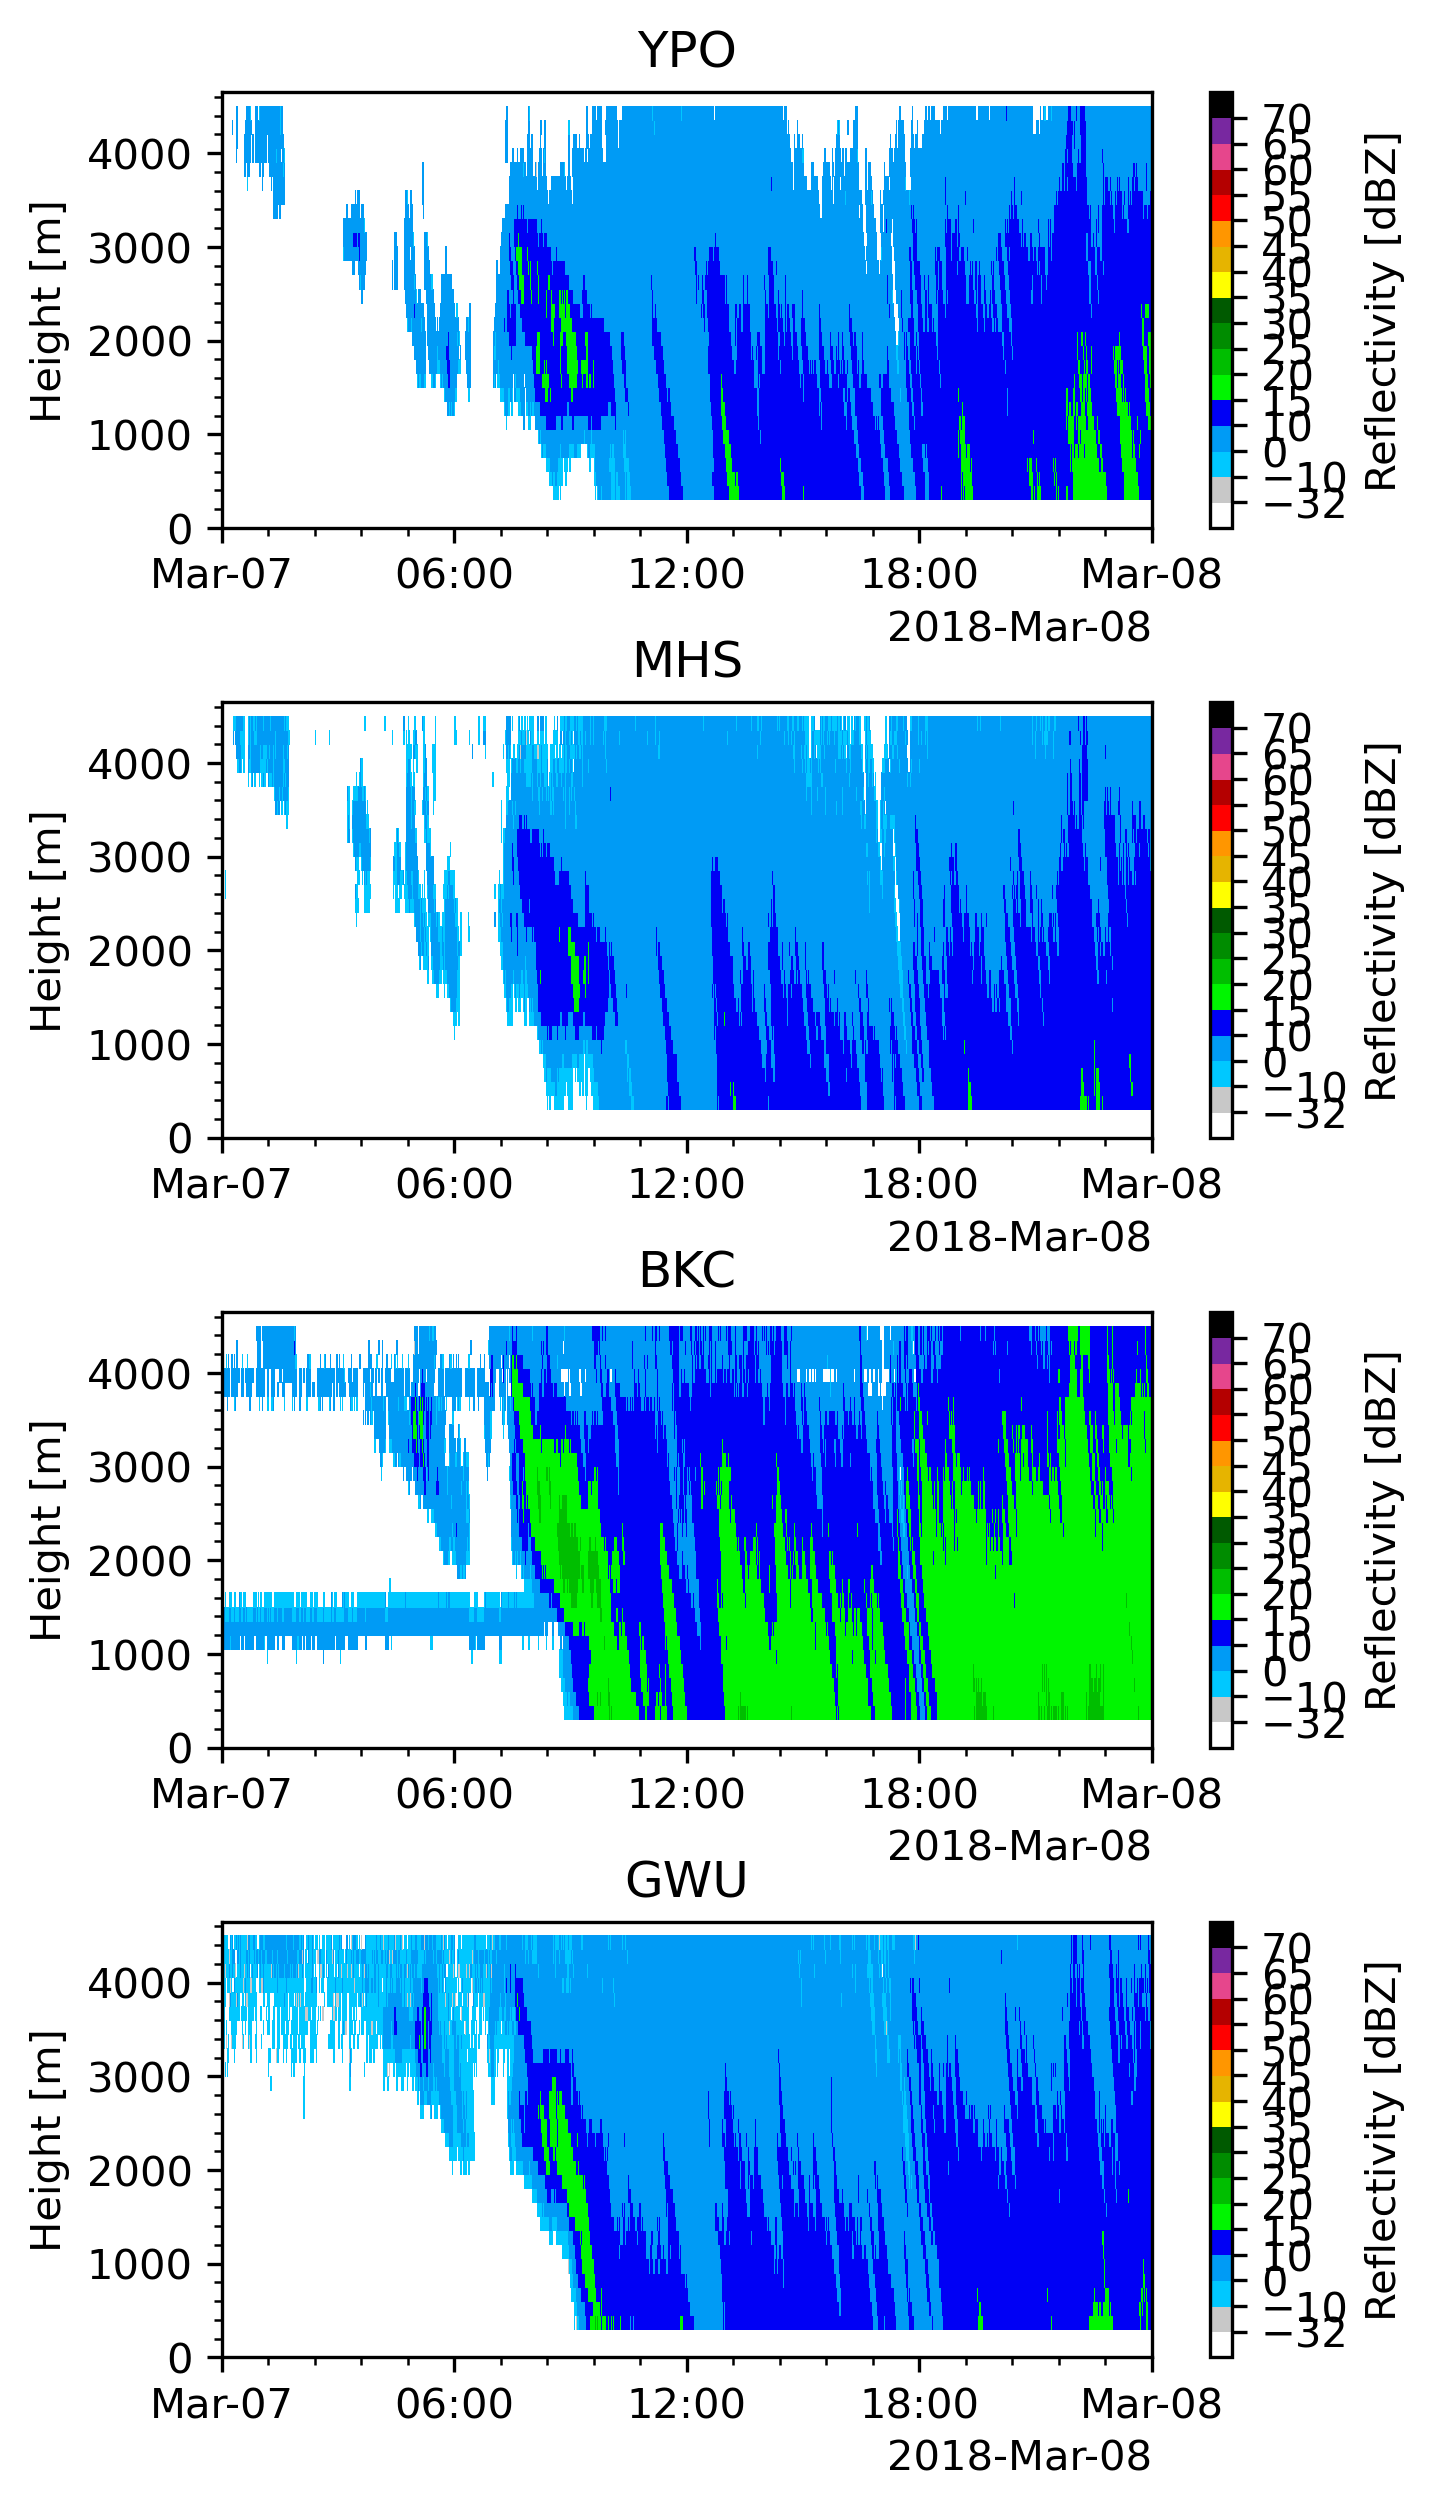

In [3]:
fig = plt.figure(figsize=(5,10), dpi=300)
gs = fig.add_gridspec(len(sites), 1, hspace=0.4)
cmap = kkpy.cm.refl()
locator = mdates.AutoDateLocator(minticks=3, maxticks=6)
formatter = mdates.ConciseDateFormatter(locator)
    
for i_site, site in enumerate(sites):
    MRR = MRRs[site]
    
    # get x-axis
    times = pd.to_datetime(num2date(MRR['time'][:], MRR['time'].units,
                                    calendar='standard',
                                    only_use_cftime_datetimes=False,
                                    only_use_python_datetimes=True))

    firsttime = [times[0] - (times[1]-times[0])]
    times = pd.DatetimeIndex(firsttime).append(times)
    
    # get y-axis
    heights = np.append(0, MRR['height'][0,:])
    
    # plot
    ax = plt.subplot(gs[i_site])
    pm = ax.pcolormesh(times, heights, MRR['Ze'][:].T,
                       cmap=cmap['cmap'],
                       norm=cmap['norm'])
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    plt.minorticks_on()
    ax.set_ylabel('Height [m]')
    ax.set_title(site)
    plt.colorbar(pm, ax=ax, ticks=cmap['ticks']).set_label('Reflectivity [dBZ]')